# Brain Tumor Detection with MRI-Scanned images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Preparing the Data

In [2]:
dataset = pd.read_csv("dataset/Brain Tumor.csv")
dataset = dataset.loc[:, ["Image", "Class"]]
dataset.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


## Image Pre-processing (Vectorization)

In [3]:
def preprocess_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28, 28))
    return image.flatten()

In [4]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, -1].values
X = [preprocess_image("dataset/Brain Tumor Images/" + img + ".jpg") for img in X]

## Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## Trying Different Algorithms

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True)
cf_scores = []

models = {"Logistic Regression": LogisticRegression(max_iter=1000), 
          "KNN": KNeighborsClassifier(), 
          "RBF Kernel SVM": SVC(kernel="rbf")}
results = []

for m in models.values(): 
    model = make_pipeline(StandardScaler(), m)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

## Visualising Models' Scores

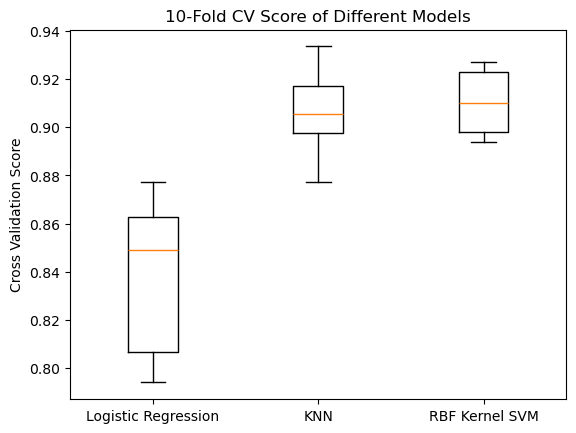

In [7]:
plt.boxplot(results, tick_labels=models.keys())
plt.title("10-Fold CV Score of Different Models")
plt.ylabel("Cross Validation Score")
plt.show()

#### **While visualising different model's scores, we can clearly see that SVM is outperforming!**
#### **So we will choose SVM with `rbf` Kernel**

## Training the SVM Model with `rbf` kernel

In [8]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
svm_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

## Evalutation of the Model

1 = Tumor, 0 = Non-Tumor



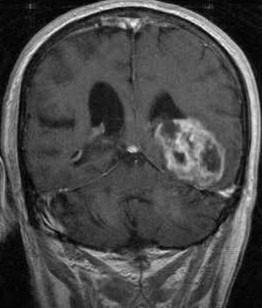

Result: 1 i.e. Tumor



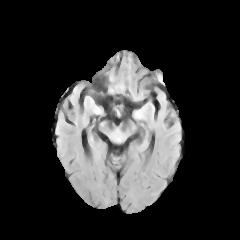

Result: 0 i.e. Non-Tumor



In [9]:
from IPython.display import Image, display

print("1 = Tumor, 0 = Non-Tumor\n")

tumor_image = preprocess_image('./tumor_test.jpg')
display(Image(filename='./tumor_test.jpg'))
prediction = svm_model.predict([tumor_image])[0]
print(f"Result: {prediction} i.e. {"Tumor" if prediction == 1 else "Non-Tumor"}\n")

no_tumor_image = preprocess_image('./no_tumor_test.jpg')
display(Image(filename='./no_tumor_test.jpg'))
prediction = svm_model.predict([no_tumor_image])[0]
print(f"Result: {prediction} i.e. {"Tumor" if prediction == 1 else "Non-Tumor"}\n")

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Report: {report}")
print(f"Confusion Matrix:\n {cm}")

Accuracy: 0.9335989375830013
Report:               precision    recall  f1-score   support

           0       0.93      0.96      0.94       431
           1       0.94      0.90      0.92       322

    accuracy                           0.93       753
   macro avg       0.93      0.93      0.93       753
weighted avg       0.93      0.93      0.93       753

Confusion Matrix:
 [[412  19]
 [ 31 291]]
